In [417]:
import pubchempy as pcp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pybel
import openbabel as ob
from rdkit import Chem 
from rdkit.Chem import FragmentCatalog
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import AllChem
%matplotlib inline
import logging
logging.basicConfig(filename='example.log', filemode='w', level=logging.DEBUG)

def wrapping(CID):
    smiles=SMILES(CID)
    loc=func_group(CID)
    graph=graphme(smiles)
    print(smiles)
    print(loc)
    print(graph)
    return 
    
def SMILES(CID):
    """
    Description:
    This function produces a SMILES from CID number input 
    """
    #CID number can be gained from URL:https://pubchem.ncbi.nlm.nih.gov/
    c = pcp.Compound.from_cid(CID)
    FORMULA=c.molecular_formula
    SMILES=c.canonical_smiles
    
    return SMILES

def func_group(CID):
    """
    Description:
    This function tells the position of substructure.
    The length of the outer tuple is the number of matched substructures, 
    while the integers in the inner tuple are the indices of the molecule's atoms.

    """
    c = pcp.Compound.from_cid(CID) 
    inchi=c.inchi
    smiles=c.isomeric_smiles
    mol=Chem.MolFromInchi(inchi)
    result=Chem.MolFromSmiles(smiles)
    loc=Chem.Mol.GetSubstructMatches(mol,result,uniquify=True)
    
    return loc

def graphme(SMILES):
    """
    Description:
    This function generates a visualization of the Gasteiger partial charges.
    """
    mol = Chem.MolFromSmiles(SMILES)
    AllChem.ComputeGasteigerCharges(mol)
    contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
    return fig

DEBUG:pubchempy:Request URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/JSON
DEBUG:pubchempy:Request data: b'cid=10070'
DEBUG:pubchempy:Created Compound(10070)


matplotlib.figure.Figure

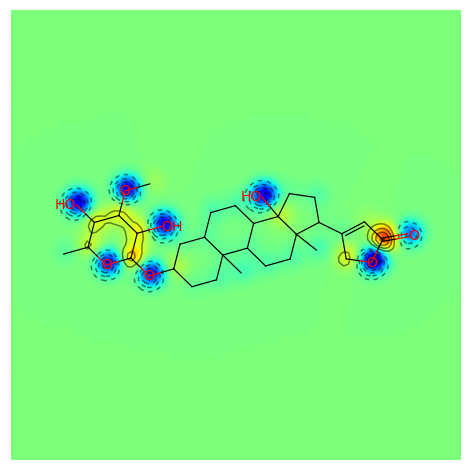

In [418]:
type(graphme(SMILES(10070)))

In [339]:
def test_SMILES():
    assert type(CID)=="int","Wrong type of input CID"
    assert type(SMILES)=='function',"Wrong type of result, it should return a SMILES as a function"